<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tips-on-python-coding" data-toc-modified-id="Tips-on-python-coding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tips on python coding</a></span></li><li><span><a href="#Euler-Method-for-ordinary-differential-equations" data-toc-modified-id="Euler-Method-for-ordinary-differential-equations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Euler Method for ordinary differential equations</a></span><ul class="toc-item"><li><span><a href="#Euler-Method-for-a-harmonic-oscillator" data-toc-modified-id="Euler-Method-for-a-harmonic-oscillator-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Euler Method for a harmonic oscillator</a></span></li></ul></li><li><span><a href="#Modified-Euler-Method" data-toc-modified-id="Modified-Euler-Method-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modified Euler Method</a></span><ul class="toc-item"><li><span><a href="#Euler-Richardson-method-(2nd-order-Runge-Kutta-method)" data-toc-modified-id="Euler-Richardson-method-(2nd-order-Runge-Kutta-method)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Euler-Richardson method (2nd order Runge-Kutta method)</a></span></li><li><span><a href="#Runge-Kutta-method-and-further:--Using-&quot;scipy&quot;,--scientific-library-of-python" data-toc-modified-id="Runge-Kutta-method-and-further:--Using-&quot;scipy&quot;,--scientific-library-of-python-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Runge-Kutta method and further:  Using "scipy",  scientific library of python</a></span></li></ul></li><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 1</a></span></li><li><span><a href="#Appendix:-a-simple-example-to-add-inline-GUI" data-toc-modified-id="Appendix:-a-simple-example-to-add-inline-GUI-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Appendix: a simple example to add inline GUI</a></span></li></ul></div>

In [1]:
%matplotlib inline

# Lecture on Numerical Simulation Methods (1)

Goal: Learning
 - how to use jupyter(ipython notebook)
   - type of cells: "Markdown" and "code"
   - elements of "Markdown"
 <!-- fundamental statements of python through sample codes in the following -->
 - methods to solve ordinary differential equations (ode) and functions in scipy (scientific python) for ode
 
An tutorial page about jupyter:  http://qiita.com/taka4sato/items/2c3397ff34c440044978

It is recommended to create a new notebook, copy&paste sample codes in the following and try to use them.
(新しいノートブックを作成し、下のサンプルコードをコピーして実行、改変を試してみることを推奨する）


## Tips on python coding


 - Grouping statements is described by indentation ("space" or "tab")
 - Flow control statements "for", "while" and "if" are somewhat different from those of C, Java and fortran.
   See e.g. http://docs.python.jp/2/tutorial/
 - To define a function, use "def" statement.
 - If you would like to plot on a new window, execute "%matplotlib auto".


## Euler Method for ordinary differential equations

The simplest numerical method for solving a differential equation is called the Euler Method, which is a discretization of the differentiation.
For the definition of the differentiation
\begin{equation}
 \frac{dx}{dt} = \lim_{h  \rightarrow 0} \frac{x(t + h ) - x(t)}{h } ,
\end{equation}
we take a finite $h$.
For a differential equation
$$
  \frac{dx}{dt} = f(x),
$$
we calculate numerically $x(t+h)$ from $x(t)$ by
\begin{equation}
 x(t + h ) = x(t) + h  f(x(t))
\end{equation}

### Euler Method for a harmonic oscillator

Let's try to calculate a harmonic oscillator equation
$$
\begin{eqnarray}
   \frac{dx}{dt} & = & v \\
   \frac{dv}{dt} & = & - kx
\end{eqnarray}
$$
by using the Euler method.

note:

To solve heigher-order differential equations, we rewrite them as a first-order equations by defining some new variables.



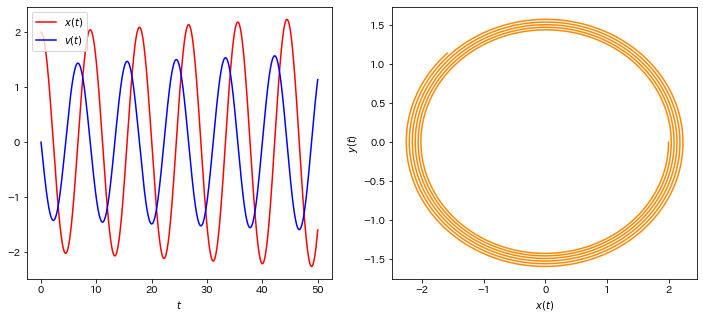

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def harmonic_eq(x,t,k):
    # k = 0.5
    return x[1], - k*x[0]

def euler_2var(x, func, t, k, dt):
    y = func(x,t,k)
    return x[0] + dt*y[0], x[1]+ dt*y[1]

def calc_plot2var(method, equation, k, dt, n_steps):
    t = np.arange(0, n_steps*dt, dt) # 0からdt刻みにn_step個の1次元配列を作成
    x = np.zeros((n_steps,2))     # n_step行2列の配列を作成し、初期値を０にする
    x[0][0] = 2.0    # initial position
    for i in range(n_steps-1): # 1刻みにrangeは引数個の配列をつくる [0,1,2,3, ...]
        x[i+1] = method(x[i],harmonic_eq, t[i], k, dt)
    
    fig = plt.figure(figsize=(12,5))
    axes = fig.add_subplot(1,2,1)
    axes.plot(t, x[:,0], 'r', label="$x(t)$")
    axes.plot(t, x[:,1], 'b', label="$v(t)$")
    axes.set_xlabel("$t$")
    
    plt.legend(loc='upper left')
    
    #plot a trajectory
    axes = fig.add_subplot(1,2,2)
    axes.plot(x[:,0], x[:,1],'#ff8800')
    axes.set_xlabel("$x(t)$")
    axes.set_ylabel("$y(t)$")
    plt.show()

if __name__ == "__main__" :
    dt = 0.01
    n_steps = 5000
    k = 0.5
    calc_plot2var(euler_2var, harmonic_eq, k, dt, n_steps)
    

    

You can easily find the solution is given by a trigonometric function. On the contrary, The above result shows non-periodic motion where the amplitude monotonically grows. This is an example showing the numerical error accumulating as time proceeds. In some cases, the error changes its sign step by step, and as a result, the sum of error cause little problem.


## Modified Euler Method
To motivate the need for improved methods, we discuss why the simple Euler algorithm is insufficient for certain kinds of equation.

The below figure shows the exact solution of an differential equation and the Euler approximation:
$$
    x(t) = x(t_0) + \int_{t_0}^t f(x(\tau ))d\tau
$$

This means that the Euler method always overestimates the change (increment) when the exact solution is convex upward.When the difference of Euler method as shown the following schematic figure always has the same sign, the numerical error accumulates as time proceeds.

![Illustration for Euler Method](http://toyoki-lab.ee.yamanashi.ac.jp/~toyoki/lectures/simulationMethods/eulerMethod.png)


### Euler-Richardson method (2nd order Runge-Kutta method)

An improved method is given by

$$
   x(t+h ) = x(t) + h f(x(t)  + hf(x(t))/2)
$$

which means that one calculate the half-step difference (a trial value) and then using that value, one obtain the difference. This is called the Euler-Richardson method.

Another method is defined as

$$
   x(t+h ) = x(t) + \frac{h }{2} \left[ f(x(t)) +
					      f(x^p(t+h ))\right]
$$
where 
$$
     x^p(t+h ) = x(t) + h f(x(t))
$$
is the predictive value at
$
t + h
$
This is called the Heun method (or the  improved Euler method).

You can prove that the both method is mathematically equvalent by Taylor expansion of the equation in terms of 
$
h.
$
The following figure shows a schematic presentation for the latter method.

![Illustration of Heun Method](http://toyoki-lab.ee.yamanashi.ac.jp/~toyoki/lectures/simulationMethods/heunMethod.png)

The below is an example where the Heun method is explicitly defined. As shown in the figure, the solution looks like a periodic motion as expected.


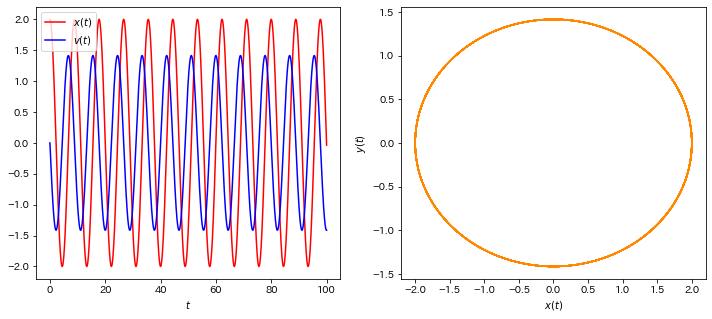

In [3]:
def heun_2var(x, func,t, k, dt) :
    temp1 = np.zeros(2)
    temp2 = np.zeros(2)
    temp1 = func(x,t,k)
    temp2 = func([x[0]+temp1[0]*dt, x[1]+temp1[1]*dt], t, k)
    val1 = x[0] + dt/2.0 * (temp1[0] + temp2[0])
    val2 = x[1] + dt/2.0 * (temp1[1] + temp2[1])
    return val1, val2

if __name__ == "__main__" :
    dt = 0.01
    n_step = 10000
    k= 0.5
    calc_plot2var(heun_2var, harmonic_eq, k, dt, n_step)
                 

### Runge-Kutta method and further:  Using "scipy",  scientific library of python

The accuracy of the previous method is 
$
O(h^2).
$
Usually the forth-order Runge-Kutta method is used:

$$
   x(t+h) = x(t) + \frac{1}{6} (k_1 + 2k_2 + 2k_3 + k_4)
$$

where
$$
 \begin{eqnarray*}
k_1 &= & hf(t, x(t))\\
k_2 &= & hf(t+\frac{h}{2}, x(t)+\frac{k_1}{2})\\
k_3 &= & hf(t+\frac{h}{2}, x(t)+\frac{k_2}{2})\\
k_4 &= & hf(t+h, x(t)+k_3)
\end{eqnarray*}
$$

Imporved methods derived from Runge-Kutta are implemented in "scipy" where the most appropriate method is automatically selected (probably). These are implemented by C libraries such as BLAS and so it is very fast. <span class="burk">The standard library is "odeint"</span>.

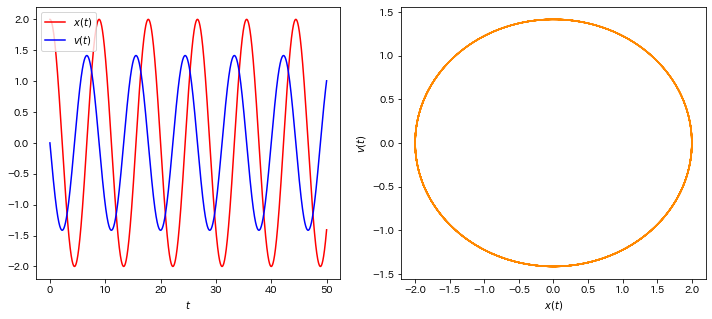

In [4]:
import numpy as np
from scipy.integrate import odeint

def plot_func(t,x):
    fig = plt.figure(figsize=(12,5))
    axes = fig.add_subplot(1,2,1)
    axes.plot(t, x[:,0], 'r', label="$x(t)$")
    axes.plot(t, x[:,1], 'b', label="$v(t)$")
    axes.set_xlabel("$t$")
    
    plt.legend(loc='upper left')
    #plot a trajectory
    axes = fig.add_subplot(1,2,2)
    axes.plot(x[:,0], x[:,1],'#ff8800')
    axes.set_xlabel("$x(t)$")
    axes.set_ylabel("$v(t)$")
    plt.show()

dt = 0.01
n_steps = 5000
t = np.arange(0, n_steps*dt, dt)
x = np.zeros((2))
x[0] = 2.0    # initial position
x[1] = 0.0    # initial velocity
k = 0.5
y = odeint(harmonic_eq,(x[0], x[1]),t, args =(k,)) # The definition of the diff. eq. (1st argument) must be defined in the above.
plot_func(t,y)

## Exercise 1

 - Read the above scripts and examine how the values of the time step "dt" and the parameter "k" affect the result.
 - Try to solve the following differential equation by the Euler method and other improved methods mensioned below. (It is recommended to try it on a new notebook.)
 $$
 \begin{eqnarray*}
 \frac{dy}{dt} & = & z \\
 \frac{dz}{dt} & = & \mu (1-y^2)z -y
 \end{eqnarray*}
 $$
 The solution for $\mu > 0$ would show pretty interesting behavior. (This is called "van der Pol equation".)

## Appendix: a simple example to add inline GUI


You can easily make a graphical user interface for choosing parameter values by [ipywidgets](http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html).
A simple implementation is shown below.

Unfortunately you cannnot change the width of the internal description field, and so the string representation of the slider value is limited as seen at "dt".

The function in "interact" is always updated when the state of widgets is changed. This feature is incovinient if it takes long time to execute the function. For such cases, try to use "interact_manual" instead of "interact". A button is automatically added to the interact controls that allows you to trigger an execute event.

More flexible gui examples are written in http://toyoki-lab.ee.yamanashi.ac.jp/~toyoki/lectures/simulationMethods/ipywidgetsExamples.html




In [5]:
from ipywidgets import interact, fixed, interact_manual
interact_manual(calc_plot2var, method={"Euler": euler_2var,
                                       "Heun":heun_2var},
                equation=fixed(harmonic_eq), k = (0.1, 2.1, 0.1), 
                dt=(0.001, 0.05,0.001), n_steps=(100,10000,100))

interactive(children=(Dropdown(description='method', options={'Euler': <function euler_2var at 0x7fe73794e7b8>…

<function __main__.calc_plot2var(method, equation, k, dt, n_steps)>